# Comparing HUG-SMC, THUG-SMC and RWM-SMC on BIP model

### Settings and Target

In [1]:
import numpy as np
from numpy import exp, log, zeros, eye, ceil
from numpy.linalg import norm
from numpy.random import uniform, randn, choice
from scipy.stats import norm as ndist
from warnings import catch_warnings, filterwarnings
from scipy.optimize import fsolve

from smc_thug import SMCTHUG, computational_cost
# from g_and_k_functions import fnorm, fnorm_broadcast, logprior
# from g_and_k_functions import data_generator, grad_fnorm, sample_prior
# from g_and_k_functions import log_epanechnikov_kernel, new_point

In [2]:
# # Settings for G and K model
# n_latents = 20
# seed = 1234
# theta0 = np.array([3.0, 1.0, 2.0, 0.5])
# n_params = len(theta0)
# d = n_latents + n_params

# # Generate Data
# y_star = data_generator(theta0, n_latents, seed)

### SMC-HUG

N = 5000
B = 5

smc_hug = SMCTHUG(
    N=N,
    d=d,
    ystar=y_star,
    logprior=logprior,
    ϵmin=0.2,
    pmin=0.2,
    pter=0.01,
    mcmc_iter=B,
    δ0=0.04,
    minstep=0.1/B,
    maxstep=1.0/B,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=200,
    B=B,
    maxMCMC=10,
    precondition=False
)

smc.sample_prior = lambda: sample_prior(n_params, n_latents)
smc.h = fnorm
smc.h_broadcast = fnorm_broadcast
smc.grad_h = lambda ξ: grad_fnorm(ξ, y_star)
smc.get_γ = lambda i: 0.0 #i**(-1/2)    # Set it to be constant.

out = smc.sample()

### THUG-SMC on Approximate Lifted Distribution (BIP)

Deterministic Function $F_L:\mathbb{R}^3\to\mathbb{R}$ 
$$
F_L(\xi) = F_L(\theta, \eta) = F(\theta) + \sigma\eta \qquad \sigma > 0
$$
where $F:\mathbb{R}^2\to\mathbb{R}$ is given by

In [3]:
# functions for approximate lifted BIP posterior 
from bip_functions import F, FL, logpriorL, log_epanechnikov_kernelL
from bip_functions import log_posteriorL, grad_FL, FL_broadcast, sample_priorL
from smc_thug import SMCTHUG

from numpy import errstate, log, ones, zeros
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [4]:
N = 5000
B = 5
σ = 1e-8
y_bip = 1
d_bip = 3

In [9]:
ϵmin = 1e-10
pmin = 0.3
pter = 0.01
δ0 = 0.5
minstep = 0.001
maxstep = 1.0
maxiter = 200
maxMCMC = 10
αmax = 0.9999
αmin = 0.01

In [6]:
##### THUG!!
smc_bip_thug = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0,
    minstep=minstep,
    maxstep=maxstep,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    αmax=αmax,
    αmin=αmin,
    both_stopping_criterions=True
)
#0.04
smc_bip_thug.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_thug.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_thug.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_thug.sample_prior = sample_priorL
smc_bip_thug.get_γ = lambda i: 1.0 #i**(-1/20)  

out_bip_thug = smc_bip_thug.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01.
### MCMC kernel: THUG.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 12.5792900000	 N unique starting: 3134
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3448
Stepsize used in next SMC iteration: 0.5113
Alpha used in next SMC iteration: 0.0100

### SMC step:  2
ϵ = 3.8442700000	 N unique starting: 3041
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3473
Stepsize used in next SMC iteration: 0.5235
Alpha used in next SMC iteration: 0.0100

### SMC step:  3
ϵ = 1.7268300000	 N unique starting: 2991
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3340
Stepsize used in next SMC iteration: 0.5325
Alpha used in next SMC iteration: 0.0100

### SMC step:  4
ϵ = 1.3739200000	 N unique starting: 3018
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3015
Stepsize used in next 

Average Acceptance Probability: 0.1577
Stepsize used in next SMC iteration: 0.0976
Alpha used in next SMC iteration: 0.2316

### SMC step:  39
ϵ = 0.0005600000	 N unique starting: 2762
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1525
Stepsize used in next SMC iteration: 0.0906
Alpha used in next SMC iteration: 0.2589

### SMC step:  40
ϵ = 0.0004400000	 N unique starting: 2729
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1465
Stepsize used in next SMC iteration: 0.0839
Alpha used in next SMC iteration: 0.2894

### SMC step:  41
ϵ = 0.0003500000	 N unique starting: 2698
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1444
Stepsize used in next SMC iteration: 0.0776
Alpha used in next SMC iteration: 0.3224

### SMC step:  42
ϵ = 0.0002800000	 N unique starting: 2721
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1430
Stepsize used in next SMC iteration: 0.0718
Alpha used in next SMC iteration: 0.3576

### SMC step:  

Average Acceptance Probability: 0.1874
Stepsize used in next SMC iteration: 0.0069
Alpha used in next SMC iteration: 0.9838

### SMC step:  78
ϵ = 0.0000000000	 N unique starting: 2807
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1769
Stepsize used in next SMC iteration: 0.0065
Alpha used in next SMC iteration: 0.9856

### SMC step:  79
ϵ = 0.0000000000	 N unique starting: 2841
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1775
Stepsize used in next SMC iteration: 0.0061
Alpha used in next SMC iteration: 0.9873

### SMC step:  80
ϵ = 0.0000000000	 N unique starting: 2835
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1820
Stepsize used in next SMC iteration: 0.0057
Alpha used in next SMC iteration: 0.9887

### SMC step:  81
ϵ = 0.0000000000	 N unique starting: 2779
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1868
Stepsize used in next SMC iteration: 0.0054
Alpha used in next SMC iteration: 0.9899

### SMC step:  

### HUG-SMC on Approximate Lifted Distribution

In [10]:
##### HUG!!
smc_bip_hug = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0,
    minstep=minstep,
    maxstep=maxstep,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    thug=True,
    force_hug=True,
    both_stopping_criterions=True
)
smc_bip_hug.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_hug.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_hug.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_hug.sample_prior = sample_priorL
#smc_bip_hug.get_γ = lambda i: 0.0      ############################################ Set it to be constant for HUG!

out_bip_hug = smc_bip_hug.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01.
### MCMC kernel: HUG.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 14.5531800000	 N unique starting: 3148
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3442
Stepsize used in next SMC iteration: 0.5112
Alpha used in next SMC iteration: 0.0000

### SMC step:  2
ϵ = 4.6301100000	 N unique starting: 2967
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3426
Stepsize used in next SMC iteration: 0.5222
Alpha used in next SMC iteration: 0.0000

### SMC step:  3
ϵ = 2.1325900000	 N unique starting: 3011
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3465
Stepsize used in next SMC iteration: 0.5345
Alpha used in next SMC iteration: 0.0000

### SMC step:  4
ϵ = 1.5027200000	 N unique starting: 2978
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3036
Stepsize used in next S

Average Acceptance Probability: 0.1470
Stepsize used in next SMC iteration: 0.0943
Alpha used in next SMC iteration: 0.0000

### SMC step:  39
ϵ = 0.0005500000	 N unique starting: 2704
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1446
Stepsize used in next SMC iteration: 0.0872
Alpha used in next SMC iteration: 0.0000

### SMC step:  40
ϵ = 0.0004400000	 N unique starting: 2707
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1368
Stepsize used in next SMC iteration: 0.0804
Alpha used in next SMC iteration: 0.0000

### SMC step:  41
ϵ = 0.0003500000	 N unique starting: 2695
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1387
Stepsize used in next SMC iteration: 0.0742
Alpha used in next SMC iteration: 0.0000

### SMC step:  42
ϵ = 0.0002800000	 N unique starting: 2655
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1323
Stepsize used in next SMC iteration: 0.0682
Alpha used in next SMC iteration: 0.0000

### SMC step:  

Average Acceptance Probability: 0.1162
Stepsize used in next SMC iteration: 0.0025
Alpha used in next SMC iteration: 0.0000

### SMC step:  78
ϵ = 0.0000000000	 N unique starting: 2407
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1198
Stepsize used in next SMC iteration: 0.0023
Alpha used in next SMC iteration: 0.0000

### SMC step:  79
ϵ = 0.0000000000	 N unique starting: 2419
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1222
Stepsize used in next SMC iteration: 0.0021
Alpha used in next SMC iteration: 0.0000

### SMC step:  80
ϵ = 0.0000000000	 N unique starting: 2410
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1242
Stepsize used in next SMC iteration: 0.0019
Alpha used in next SMC iteration: 0.0000

### SMC step:  81
ϵ = 0.0000000000	 N unique starting: 2363
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1274
Stepsize used in next SMC iteration: 0.0018
Alpha used in next SMC iteration: 0.0000

### SMC step:  

Average Acceptance Probability: 0.0145
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.0000

### SMC step:  117
ϵ = 0.0000000000	 N unique starting: 884
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0128
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.0000

### SMC step:  118
ϵ = 0.0000000000	 N unique starting: 849
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0110
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.0000

### SMC step:  119
ϵ = 0.0000000000	 N unique starting: 824
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.0144
Stepsize used in next SMC iteration: 0.0010
Alpha used in next SMC iteration: 0.0000
Latest ϵ == ϵmin. Breaking


### RWM on Approximate Lifted Distribution (BIP)

Suppose for Hug/Thug we start with $\delta_0$ and adapt the step size within the range $\delta_{H}\in[\delta_{\min}, \delta_{\max}]$. This means for each particle, and for each MCMC iteration we do $B$ steps, each with stepsize $\delta$. In a way the full step size is $\delta B$.

Perhaps the best way to compare this with RWM is to use a step size within the range $\delta_{R}\in[\delta_{\min}B, \delta_{\max}B]$

In [11]:
smc_bip_rwm = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=ϵmin,
    pmin=pmin,
    pter=pter,
    mcmc_iter=B,
    δ0=δ0,
    minstep=minstep,
    maxstep=maxstep,
    manual_initialization=False,
    iterscheme='fixed',
    maxiter=maxiter,
    B=B,
    maxMCMC=maxMCMC,
    precondition=False,
    thug=False,
    both_stopping_criterions=True
)

smc_bip_rwm.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_rwm.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_rwm.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_rwm.sample_prior = sample_priorL

out_bip_rwm = smc_bip_rwm.sample()

### Stopping Criterion: Minimum Tolerance 1e-10 and Terminal Acceptance Probability 0.01.
### MCMC kernel: isotropic RWM.
### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 13.7640000000	 N unique starting: 3153
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.2018
Stepsize used in next SMC iteration: 0.4760
Alpha used in next SMC iteration: 0.0000

### SMC step:  2
ϵ = 3.3449400000	 N unique starting: 2931
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1821
Stepsize used in next SMC iteration: 0.4488
Alpha used in next SMC iteration: 0.0000

### SMC step:  3
ϵ = 1.6463600000	 N unique starting: 2902
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1619
Stepsize used in next SMC iteration: 0.4188
Alpha used in next SMC iteration: 0.0000

### SMC step:  4
ϵ = 1.3118900000	 N unique starting: 2883
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.1335
Stepsize used

In [ ]:
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# # Unique Particles
# ax[0, 0].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['UNIQUE_PARTICLES']))), label='THUG-SMC')
# ax[0, 0].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.n_unique_particles))), label='RWM-SMC')
# ax[0, 0].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['UNIQUE_PARTICLES']))), label='HUG-SMC')
# ax[0, 0].set_xlabel("ϵ")
# ax[0, 0].set_ylabel("Unique Particles")
# ax[0, 0].set_xscale('log')

# # Step Sizes
# ax[0, 1].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['STEP_SIZES']))), label='THUG-SMC')
# ax[0, 1].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.step_sizes[:-1]))), label='RWM-SMC')
# ax[0, 1].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['STEP_SIZES']))), label='HUG-SMC')
# ax[0, 1].set_xlabel("ϵ")
# ax[0, 1].set_ylabel("Step Sizes")
# ax[0, 1].set_xscale('log')
# ax[0, 1].set_yscale('log')

# # ESS
# ax[1, 0].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['ESS']))), label='THUG-SMC')
# ax[1, 0].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.ESS))), label='RWM-SMC')
# ax[1, 0].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['ESS']))), label='HUG-SMC')
# ax[1, 0].set_xlabel("ϵ")
# ax[1, 0].set_ylabel("ESS")
# ax[1, 0].set_xscale('log')
# ax[1, 0].set_yscale('log')

# # Acceptance Probability
# ax[1, 1].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['AP']))), label='THUG-SMC')
# ax[1, 1].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.accprob))), label='RWM-SMC')
# ax[1, 1].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['AP']))), label='HUG-SMC')
# ax[1, 1].set_xlabel("ϵ")
# ax[1, 1].set_ylabel("Acceptance probability")
# ax[1, 1].set_xscale('log')
# ax[1, 1].set_yscale('log')

# plt.legend()
# plt.show()

In [ ]:
# fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
# lw = 2.2

# # Unique Particles
# ax[0].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['UNIQUE_PARTICLES']))), label='THUG-SMC', lw=lw)
# ax[0].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.n_unique_particles))), label='RWM-SMC', lw=lw)
# ax[0].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['UNIQUE_PARTICLES']))), label='HUG-SMC', lw=lw)
# ax[0].set_xlabel("ϵ", fontsize=20)
# #ax[0].set_ylabel("Unique Particles")
# ax[0].set_xscale('log')
# ax[0].tick_params(axis='both', which='major', labelsize=7)
# ax[0].set_title("Unique Particles")

# # Step Sizes
# ax[1].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['STEP_SIZES']))), label='THUG-SMC', lw=lw)
# ax[1].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.step_sizes[:-1]))), label='RWM-SMC', lw=lw)
# ax[1].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['STEP_SIZES']))), label='HUG-SMC', lw=lw)
# ax[1].set_xlabel("ϵ", fontsize=20)
# #ax[1].set_ylabel("Step Sizes")
# ax[1].set_xscale('log')
# ax[1].set_yscale('log')
# ax[1].tick_params(axis='both', which='both', labelsize=7)
# ax[1].set_title("Step Sizes")

# # ESS
# ax[2].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['ESS']))), label='THUG-SMC', lw=lw)
# ax[2].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.ESS))), label='RWM-SMC', lw=lw)
# ax[2].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['ESS']))), label='HUG-SMC', lw=lw)
# ax[2].set_xlabel("ϵ", fontsize=20)
# #ax[2].set_ylabel("ESS")
# ax[2].set_xscale('log')
# ax[2].set_yscale('log')
# ax[2].tick_params(axis='both', which='both', labelsize=7)
# ax[2].set_title("ESS")

# # Acceptance Probability
# ax[3].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['AP']))), label='THUG-SMC', lw=lw)
# ax[3].plot(*zip(*sorted(zip(smc_bip_rwm.EPSILON, smc_bip_rwm.accprob))), label='RWM-SMC', lw=lw)
# ax[3].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['AP']))), label='HUG-SMC', lw=lw)
# ax[3].set_xlabel("ϵ", fontsize=20)
# #ax[3].set_ylabel("Acceptance probability")
# ax[3].set_xscale('log')
# ax[3].set_yscale('log')
# ax[3].tick_params(axis='both', which='both', labelsize=7)
# ax[3].set_title("Acceptance Probability")

# plt.legend()
# #plt.savefig("figures/smc_thug.png", dpi=300)
# plt.show()

### Prettify plot above 2/11/22

In [12]:
from matplotlib import rc
rc('font',**{'family':'STIXGeneral'})

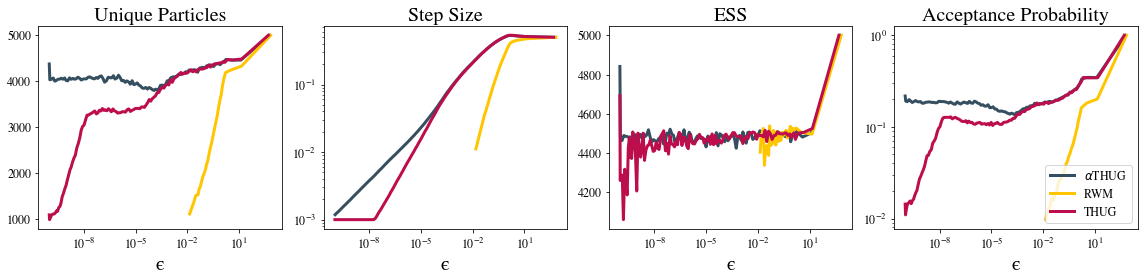

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4), sharex=True)
lw = 3
TICK_LABEL_SIZE=12
TITLE_SIZE = 20
COLOR_THUG = '#354F60'
COLOR_HUG  = '#BC0E4C'
COLOR_RWM  = '#FFC501'

# Unique Particles
ax[0].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['UNIQUE_PARTICLES']))), label=r'THUG-$\alpha$', lw=lw, color=COLOR_THUG)
ax[0].plot(*zip(*sorted(zip(out_bip_rwm['EPSILON'], out_bip_rwm['UNIQUE_PARTICLES']))), label='RWM', lw=lw, color=COLOR_RWM)
ax[0].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['UNIQUE_PARTICLES']))), label='THUG', lw=lw, color=COLOR_HUG)
ax[0].set_xlabel("ϵ", fontsize=20)
#ax[0].set_ylabel("Unique Particles")
ax[0].set_xscale('log')
ax[0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_SIZE)
ax[0].set_title("Unique Particles", fontsize=TITLE_SIZE)

# Step Sizes
ax[1].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['STEP_SIZES']))), label=r'THUG-$\alpha$', lw=lw, color=COLOR_THUG)
ax[1].plot(*zip(*sorted(zip(out_bip_rwm['EPSILON'], out_bip_rwm['STEP_SIZES']))), label='RWM', lw=lw, color=COLOR_RWM)
ax[1].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['STEP_SIZES']))), label='THUG', lw=lw, color=COLOR_HUG)
ax[1].set_xlabel("ϵ", fontsize=20)
#ax[1].set_ylabel("Step Sizes")
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[1].set_title("Step Size", fontsize=TITLE_SIZE)

# ESS
ax[2].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['ESS']))), label=r'THUG-$\alpha$', lw=lw, color=COLOR_THUG)
ax[2].plot(*zip(*sorted(zip(out_bip_rwm['EPSILON'], out_bip_rwm['ESS']))), label='RWM', lw=lw, color=COLOR_RWM)
ax[2].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['ESS']))), label='THUG', lw=lw, color=COLOR_HUG)
ax[2].set_xlabel("ϵ", fontsize=20)
#ax[2].set_ylabel("ESS")
ax[2].set_xscale('log')
# ax[2].set_yscale('log')
ax[2].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[2].set_title("ESS", fontsize=TITLE_SIZE)

# Acceptance Probability
ax[3].plot(*zip(*sorted(zip(out_bip_thug['EPSILON'], out_bip_thug['AP']))), label=r'$\alpha$THUG', lw=lw, color=COLOR_THUG)
ax[3].plot(*zip(*sorted(zip(out_bip_rwm['EPSILON'], out_bip_rwm['AP']))), label='RWM', lw=lw, color=COLOR_RWM)
ax[3].plot(*zip(*sorted(zip(out_bip_hug['EPSILON'], out_bip_hug['AP']))), label='THUG', lw=lw, color=COLOR_HUG)
ax[3].set_xlabel("ϵ", fontsize=20)
#ax[3].set_ylabel("Acceptance probability")
ax[3].set_xscale('log')
ax[3].set_yscale('log')
ax[3].tick_params(axis='both', which='both', labelsize=TICK_LABEL_SIZE)
ax[3].set_title("Acceptance Probability", fontsize=TITLE_SIZE)


plt.legend(fontsize=12, loc='lower right')
plt.tight_layout()
#plt.savefig("figures/smc_thug_adapt_both.png", dpi=300)
plt.show()

In [10]:
def update_α(α, a_hat, i, a_star):
    """Updates α based on current acceptance probability"""
    τ = log(α / (1 - α))
    γ = i**(-1/20)  
    τ = τ - γ*(a_hat - a_star)
    α = np.clip(1 / (1 + exp(-τ)), 0.0, 0.999)
    return α

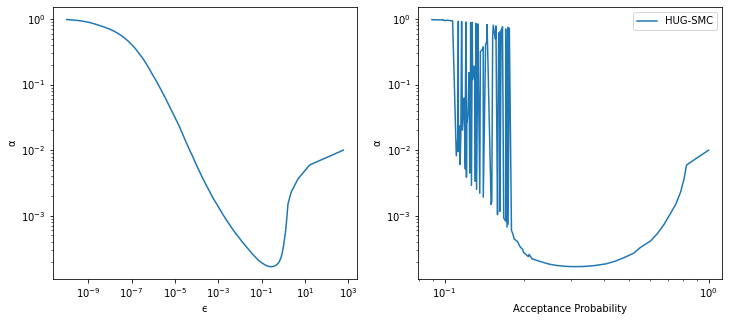

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
ax[0].plot(*zip(*sorted(zip(out_bip['EPSILON'], out_bip['ALPHAS']))), label='HUG-SMC')
ax[0].set_xlabel("ϵ")
ax[0].set_ylabel("α")
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[1].plot(*zip(*sorted(zip(out_bip['AP'], out_bip['ALPHAS']))), label='HUG-SMC')
ax[1].set_xlabel("Acceptance Probability")
ax[1].set_ylabel("α")
ax[1].set_xscale('log')
ax[1].set_yscale('log')
plt.legend()
plt.show()

In [32]:
import symnum.numpy as snp
from symnum import (
    numpify, named_array, jacobian, grad, 
    vector_jacobian_product, matrix_hessian_product)
import sympy
import numpy as np

dim_θ = 2
dim_y = 1

@numpify(dim_θ)
def forward_func(θ):
    return snp.array([θ[1]**2 + 3 * θ[0]**2 * (θ[0]**2 - 1)])

def create_fig_if_none(ax, **fig_kw):
    if ax is None:
        fig, ax = plt.subplots(**fig_kw)
    else:
        fig = ax.figure
    return fig, ax

def split_into_integer_parts(n, m):
    return [round(n / m)] * (m - 1) + [n - round(n / m) * (m - 1)]

def grid_on_interval(interval, n_points, cosine_spacing=False):
    if cosine_spacing:
        # Use non-linear spacing with higher density near endpoints
        ts =  ((1 + np.cos(np.linspace(0, 1, n_points) * np.pi)) / 2)
    else:
        ts = np.linspace(0, 1, n_points)
    # If open interval space over range [left + eps, right - eps]
    eps = 10 * np.finfo(np.float64).eps
    left = (float(interval.left) + eps if interval.left_open 
            else float(interval.left))
    right = (float(interval.right) - eps if interval.right_open 
             else float(interval.right))
    return left + ts * (right - left)



def solve_for_limiting_manifold(y, n_points=200, cosine_spacing=False):
    assert n_points % 2 == 0, 'n_points must be even'
    θ = named_array('θ', 2)
    # solve F(θ) = y for θ[1] in terms of θ[0]
    θ_1_gvn_θ_0 = sympy.solve(forward_func(θ)[0] - y, θ[1])
    # find interval(s) over which θ[0] gives real θ[1] solutions
    θ_0_range = sympy.solveset(
        θ_1_gvn_θ_0[0]**2 > 0, θ[0], domain=sympy.Reals)
    θ_0_intervals = (
        θ_0_range.args if isinstance(θ_0_range, sympy.Union) 
        else [θ_0_range])
    # create  grid of values over valid θ[0] interval(s)
    n_intervals = len(θ_0_intervals)
    θ_0_grids = [
        grid_on_interval(intvl, n_pt + 1, cosine_spacing)
        for intvl, n_pt in zip(
            θ_0_intervals, 
            split_into_integer_parts(n_points // 2, n_intervals))]
    # generate NumPy function to calculate θ[1] in terms of θ[0]
    solve_func = sympy.lambdify(θ[0], θ_1_gvn_θ_0)
    manifold_points = []
    for θ_0_grid in θ_0_grids:
        # numerically calculate +/- θ[1] solutions over θ[0] grid
        θ_1_grid_neg, θ_1_grid_pos = solve_func(θ_0_grid)
        # stack θ[0] and θ[1] values in to 2D array in anticlockwise order
        manifold_points.append(np.stack([
            np.concatenate([θ_0_grid, θ_0_grid[-2:0:-1]]),
            np.concatenate([θ_1_grid_neg, θ_1_grid_pos[-2:0:-1]])
        ], -1))
    return manifold_points

def plot_limiting_manifold(y, ax=None, num_points=200):
    manifold_points = solve_for_limiting_manifold(
        y, num_points, cosine_spacing=True)
    fig, ax = create_fig_if_none(ax)
    # repeat first point to close loop by duplicating index
    for component in manifold_points:
        indices = np.arange(component.shape[0] + 1) % component.shape[0]
        line, = ax.plot(component[indices, 0], 
                        component[indices, 1], '-', color='C1', lw=1.)
    return fig, ax, line

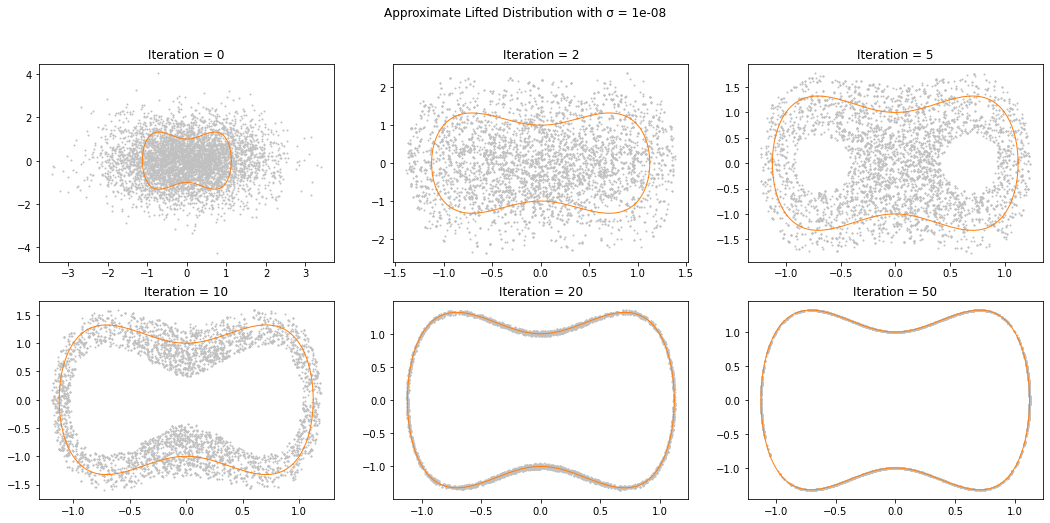

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
fig.suptitle("Approximate Lifted Distribution with σ = {}".format(σ))
### ROW 1
ax[0, 0].scatter(*out_bip['P'][:, :2, 0].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[0, 0])
ax[0, 0].set_title("Iteration = 0")

iter1 = 2
ax[0, 1].scatter(*out_bip['P'][out_bip['A'][:, iter1], :2, iter1].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[0, 1])
ax[0, 1].set_title("Iteration = {}".format(iter1))

iter2 = 5
ax[0, 2].scatter(*out_bip['P'][out_bip['A'][:, iter2], :2, iter2].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[0, 2])
ax[0, 2].set_title("Iteration = {}".format(iter2))

### ROW 2
iter3 = 10
ax[1, 0].scatter(*out_bip['P'][out_bip['A'][:, iter3], :2, iter3].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[1, 0])
ax[1, 0].set_title("Iteration = {}".format(iter3))

iter4 = 20
ax[1, 1].scatter(*out_bip['P'][out_bip['A'][:, iter4], :2, iter4].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[1, 1])
ax[1, 1].set_title("Iteration = {}".format(iter4))

iter5 = 50
ax[1, 2].scatter(*out_bip['P'][out_bip['A'][:, iter5], :2, iter5].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[1, 2])
ax[1, 2].set_title("Iteration = {}".format(iter5))
plt.show()

# RWM on Approximate Lifted Distribution (BIP)

Suppose for Hug/Thug we start with $\delta_0$ and adapt the step size within the range $\delta_{H}\in[\delta_{\min}, \delta_{\max}]$. This means for each particle, and for each MCMC iteration we do $B$ steps, each with stepsize $\delta$. In a way the full step size is $\delta B$.

Perhaps the best way to compare this with RWM is to use a step size within the range $\delta_{R}\in[\delta_{\min}B, \delta_{\max}B]$

In [10]:
smc_bip_rwm = SMCTHUG(
    N=N,
    d=d_bip,
    ystar=y_bip,
    logprior=logpriorL,
    ϵmin=1e-10,
    pmin=0.3,
    pter=0.01,
    mcmc_iter=B,
    δ0=0.04,
    minstep=0.00001,
    maxstep=0.5,
    manual_initialization=False,
    iterscheme='adaptive',
    maxiter=200,
    B=B,
    maxMCMC=10,
    precondition=True,
    thug=False
)

### Stopping Criterion: Minimum Tolerance 1e-10
### MCMC kernel: RWM with Preconditioning.


In [11]:
smc_bip_rwm.h = lambda ξ, ystar: norm(FL(ξ, σ) - ystar)
smc_bip_rwm.h_broadcast = lambda ξ, ystar: abs(FL_broadcast(ξ, σ) - ystar)
smc_bip_rwm.grad_h = lambda ξ: grad_FL(ξ, σ) * (FL(ξ, σ) - y_bip)
smc_bip_rwm.sample_prior = sample_priorL
smc_bip_rwm.get_γ = lambda i: i**(-1/20)    # Set it to be constant.

In [12]:
out_bip_rwm = smc_bip_rwm.sample()

### Particles have been initialized from the prior.
### Starting with 5000 unique particles.

### SMC step:  1
ϵ = 13.0793100000	 N unique starting: 3213
Metropolis-Hastings steps:  5
Average Acceptance Probability: 0.3626
Stepsize used in next SMC iteration: 0.0413
Alpha used in next SMC iteration: 0.0094

### SMC step:  2
ϵ = 3.5283400000	 N unique starting: 3047
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.3704
Stepsize used in next SMC iteration: 0.0428
Alpha used in next SMC iteration: 0.0088

### SMC step:  3
ϵ = 1.6390700000	 N unique starting: 3036
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.3365
Stepsize used in next SMC iteration: 0.0435
Alpha used in next SMC iteration: 0.0085

### SMC step:  4
ϵ = 1.2197200000	 N unique starting: 3036
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.2552
Stepsize used in next SMC iteration: 0.0426
Alpha used in next SMC iteration: 0.0088

### SMC step:  5
ϵ = 0.9801000000	 N unique st

Average Acceptance Probability: 0.0005
Stepsize used in next SMC iteration: 0.0003
Alpha used in next SMC iteration: 0.9736

### SMC step:  40
ϵ = 0.0038900000	 N unique starting: 275
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.0009
Stepsize used in next SMC iteration: 0.0003
Alpha used in next SMC iteration: 0.9793

### SMC step:  41
ϵ = 0.0033400000	 N unique starting: 258
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.0006
Stepsize used in next SMC iteration: 0.0002
Alpha used in next SMC iteration: 0.9838

### SMC step:  42
ϵ = 0.0029700000	 N unique starting: 238
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.0004
Stepsize used in next SMC iteration: 0.0002
Alpha used in next SMC iteration: 0.9873

### SMC step:  43
ϵ = 0.0026400000	 N unique starting: 221
Metropolis-Hastings steps:  10
Average Acceptance Probability: 0.0005
Stepsize used in next SMC iteration: 0.0002
Alpha used in next SMC iteration: 0.9900

### SMC step:  

/Users/maurocamara/Documents/University/ManifoldSampling/smc_thug.py:155: RuntimeWarning: divide by zero encountered in double_scalars
  def adaptive_n_mcmc(self): return min(self.maxMCMC, int(ceil(log(1 - self.pPmoved) / log(1 - self.accprob[-1]))))


OverflowError: cannot convert float infinity to integer

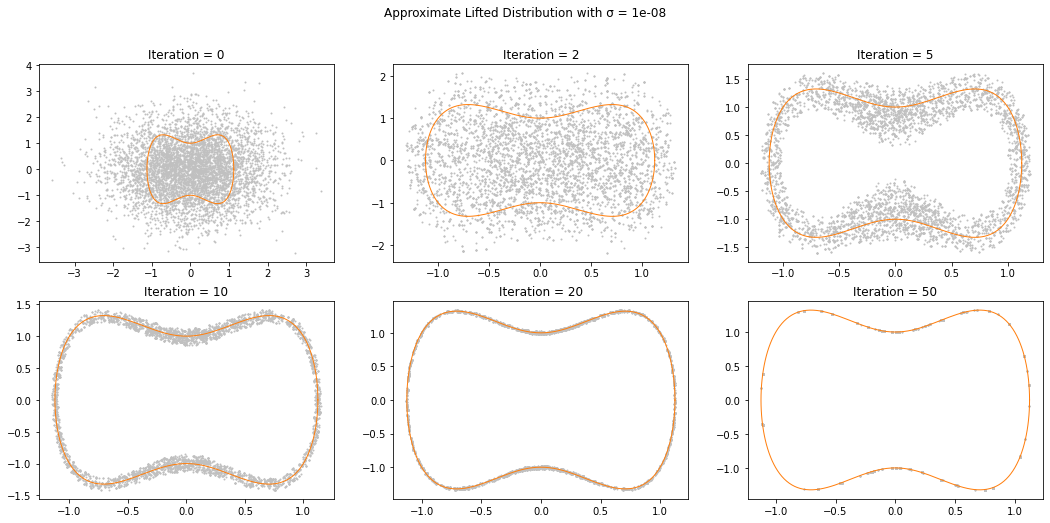

In [37]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
fig.suptitle("Approximate Lifted Distribution with σ = {}".format(σ))
### ROW 1
ax[0, 0].scatter(*smc_bip_rwm.P[:, :2, 0].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[0, 0])
ax[0, 0].set_title("Iteration = 0")

iter1 = 2
ax[0, 1].scatter(*smc_bip_rwm.P[smc_bip_rwm.A[:, iter1], :2, iter1].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[0, 1])
ax[0, 1].set_title("Iteration = {}".format(iter1))

iter2 = 5
ax[0, 2].scatter(*smc_bip_rwm.P[smc_bip_rwm.A[:, iter2], :2, iter2].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[0, 2])
ax[0, 2].set_title("Iteration = {}".format(iter2))

### ROW 2
iter3 = 10
ax[1, 0].scatter(*smc_bip_rwm.P[smc_bip_rwm.A[:, iter3], :2, iter3].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[1, 0])
ax[1, 0].set_title("Iteration = {}".format(iter3))

iter4 = 20
ax[1, 1].scatter(*smc_bip_rwm.P[smc_bip_rwm.A[:, iter4], :2, iter4].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[1, 1])
ax[1, 1].set_title("Iteration = {}".format(iter4))

iter5 = 50
ax[1, 2].scatter(*smc_bip_rwm.P[smc_bip_rwm.A[:, iter5], :2, iter5].T, s=1, color='silver')
_ = plot_limiting_manifold(y=y_bip, ax=ax[1, 2])
ax[1, 2].set_title("Iteration = {}".format(iter5))
plt.show()